Melody PEDOCS Capstone

In [1]:
import pandas as pd

# Load the Excel file
file_path = 'data/PEDOCS Capstone Data.xlsx'

# Check available sheet names first to understand the structure
excel_file = pd.ExcelFile(file_path)
excel_file.sheet_names


['WeeklyData', 'DailyData', 'Totals', 'PIVOT']

In [2]:
# Load the data from the 'WeeklyData' and 'DailyData' sheets
weekly_data = pd.read_excel(file_path, sheet_name='WeeklyData')
daily_data = pd.read_excel(file_path, sheet_name='DailyData')

# Display basic info about both datasets to understand their structure
weekly_data_info = weekly_data.info()
daily_data_info = daily_data.info()

# Show the first few rows of each dataset for a preview
weekly_data_preview = weekly_data.head()
daily_data_preview = daily_data.head()

weekly_data_info, weekly_data_preview, daily_data_info, daily_data_preview


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Week Begin                       56 non-null     datetime64[ns]
 1   Sum of Arrivals                  56 non-null     int64         
 2   Sum of LWBS Cnt                  56 non-null     int64         
 3   Sum of Psych Count               56 non-null     int64         
 4   Sum of Hrs>140PEDOCS             56 non-null     int64         
 5   Sum of ProviderHrs               56 non-null     float64       
 6   Sum of Psych_Hold_Btwn_4h & 23h  56 non-null     int64         
 7   Sum of STS Activation Count      56 non-null     int64         
 8   Average of Avg Arrv to MD        56 non-null     float64       
 9   Sum of Team5_Cnt                 56 non-null     int64         
 10  Sum of Sedation Cnt              56 non-null     int64         


(None,
   Week Begin  Sum of Arrivals  Sum of LWBS Cnt  Sum of Psych Count  \
 0 2023-09-03             1195               91                 119   
 1 2023-09-10             1204              108                 154   
 2 2023-09-17             1279              136                 178   
 3 2023-09-24             1179              110                 163   
 4 2023-10-01             1162               93                 157   
 
    Sum of Hrs>140PEDOCS  Sum of ProviderHrs  Sum of Psych_Hold_Btwn_4h & 23h  \
 0                     1               551.0                               21   
 1                    11               502.0                               37   
 2                    14               500.0                               30   
 3                    12               534.0                               19   
 4                    10               526.0                               27   
 
    Sum of STS Activation Count  Average of Avg Arrv to MD  Sum of Team5_Cnt 

<B>WeeklyData:</B> This dataset has 12 columns with 56 entries, covering aggregated weekly statistics like arrivals, LWBS counts, hours with PEDOCS scores over 140, provider hours, and counts for overflow usage (Team5), sedation, etc.

<B>DailyData:</B> This dataset contains 394 entries with 24 columns. It includes daily data such as arrivals, LWBS counts, percentage of LWBS, PEDOCS scores in various ranges, overflow area usage, sedation counts, and the number of hours where PEDOCS was greater than 140.

In [3]:
# Check for missing values in both datasets
weekly_data_missing = weekly_data.isnull().sum()
daily_data_missing = daily_data.isnull().sum()

# Clean up the data by filling or removing missing values (if applicable)
# For now, we'll fill missing numeric values with 0 and proceed with visualizations
cleaned_weekly_data = weekly_data.fillna(0)
cleaned_daily_data = daily_data.fillna(0)

# Display missing values count and cleaned dataset preview
(weekly_data_missing, daily_data_missing), cleaned_daily_data.head(), cleaned_weekly_data.head()


((Week Begin                         0
  Sum of Arrivals                    0
  Sum of LWBS Cnt                    0
  Sum of Psych Count                 0
  Sum of Hrs>140PEDOCS               0
  Sum of ProviderHrs                 0
  Sum of Psych_Hold_Btwn_4h & 23h    0
  Sum of STS Activation Count        0
  Average of Avg Arrv to MD          0
  Sum of Team5_Cnt                   0
  Sum of Sedation Cnt                0
  Sum of FellowHrs                   0
  dtype: int64,
  Date                                0
  DOW                                 0
  Week Begins                         0
  Arrivals                            0
  LWBS Cnt                            0
  LWBS%                               0
  Team5_Cnt                           0
  Sedation Cnt                        0
  STS Activation Count                0
  Avg Arrv to MD                      0
  Max Arrv to MD                      0
  Max LobbyWait - Arrv to 1st ExRm    0
  Psych Count                       

Both the WeeklyData and DailyData sheets are now cleaned, with no missing values. <BR>

WeeklyData: Contains weekly aggregates such as arrivals, LWBS count, provider hours, and PEDOCS > 140 hours.<BR>
DailyData: Contains daily-level data including arrivals, LWBS percentages, provider hours, and PEDOCS breakdowns.

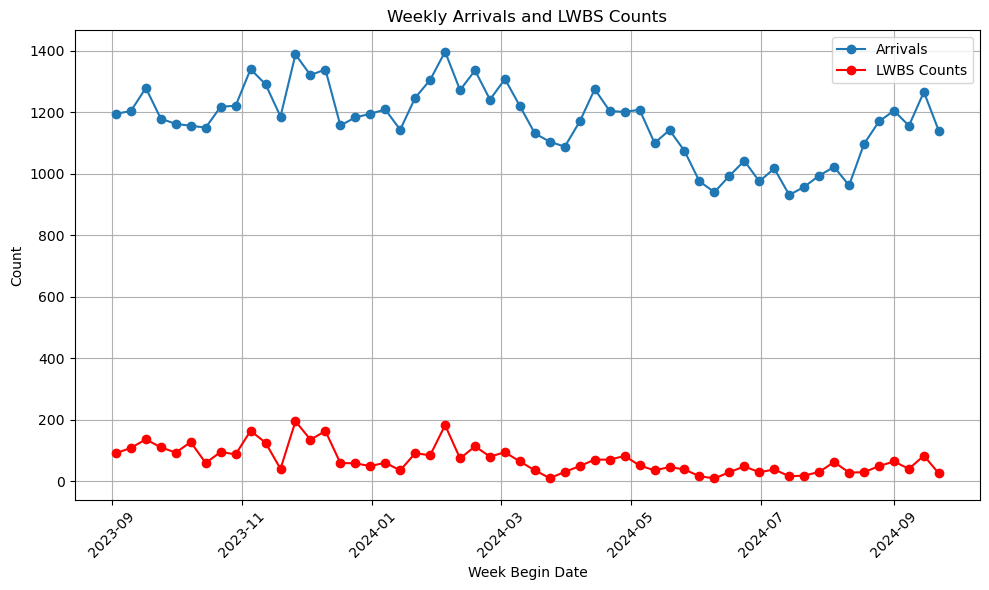

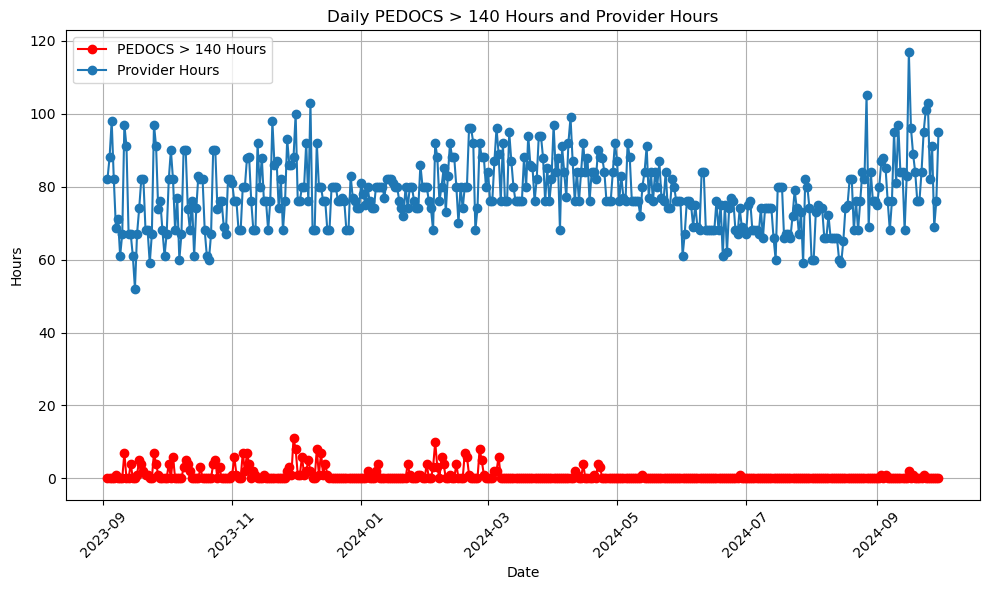

In [4]:
import matplotlib.pyplot as plt

# Weekly data visualization: Arrivals and LWBS Counts over time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_weekly_data['Week Begin'], cleaned_weekly_data['Sum of Arrivals'], label='Arrivals', marker='o')
plt.plot(cleaned_weekly_data['Week Begin'], cleaned_weekly_data['Sum of LWBS Cnt'], label='LWBS Counts', marker='o', color='r')
plt.title('Weekly Arrivals and LWBS Counts')
plt.xlabel('Week Begin Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Daily data visualization: PEDOCS Hours > 140 and Provider Hours over time
plt.figure(figsize=(10, 6))
plt.plot(cleaned_daily_data['Date'], cleaned_daily_data['Hrs>140PEDOCS'], label='PEDOCS > 140 Hours', marker='o', color='r')
plt.plot(cleaned_daily_data['Date'], cleaned_daily_data['ProviderHrs'], label='Provider Hours', marker='o')
plt.title('Daily PEDOCS > 140 Hours and Provider Hours')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Weekly Arrivals and LWBS Counts: This plot shows the number of weekly arrivals and the number of patients who left without being seen (LWBS). You can observe trends in both metrics over time, helping to identify weeks with higher patient loads and corresponding LWBS rates.

Daily PEDOCS > 140 Hours and Provider Hours: This plot illustrates the relationship between the number of hours where the PEDOCS score exceeded 140 (indicating overcrowding) and the number of provider hours. Tracking these together helps in understanding how staffing may affect overcrowding conditions.

In [5]:
# Calculate the correlation between PEDOCS > 140 hours and LWBS counts from both datasets
# Daily correlation
correlation_daily = cleaned_daily_data['Hrs>140PEDOCS'].corr(cleaned_daily_data['LWBS Cnt'])

# Weekly correlation
correlation_weekly = cleaned_weekly_data['Sum of Hrs>140PEDOCS'].corr(cleaned_weekly_data['Sum of LWBS Cnt'])

correlation_daily, correlation_weekly


(0.7850264184508086, 0.9021339802741076)

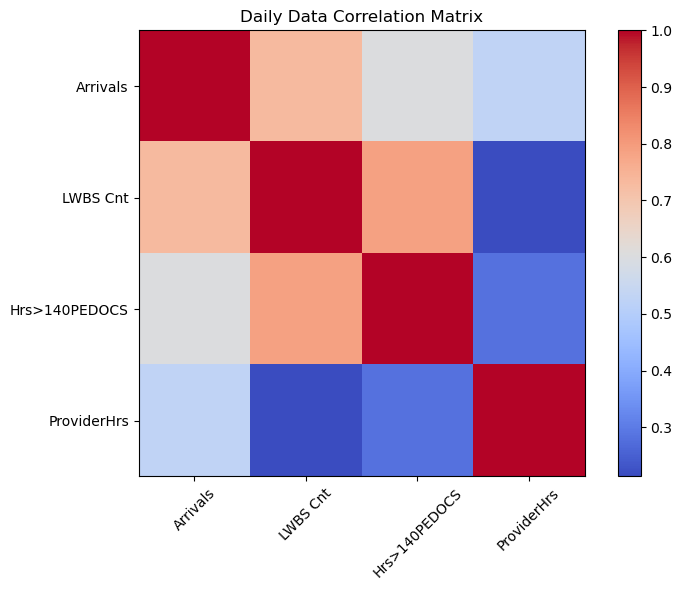

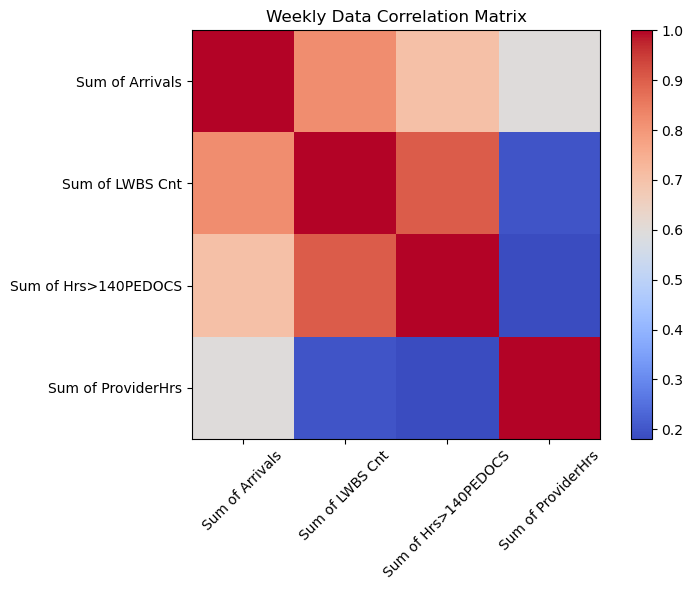

In [6]:
# Select key columns for correlation analysis
key_columns_daily = ['Arrivals', 'LWBS Cnt', 'Hrs>140PEDOCS', 'ProviderHrs']
key_columns_weekly = ['Sum of Arrivals', 'Sum of LWBS Cnt', 'Sum of Hrs>140PEDOCS', 'Sum of ProviderHrs']

# Calculate correlation matrices for both datasets
correlation_matrix_daily = cleaned_daily_data[key_columns_daily].corr()
correlation_matrix_weekly = cleaned_weekly_data[key_columns_weekly].corr()

# Visualize the correlation matrices
plt.figure(figsize=(8, 6))
plt.title('Daily Data Correlation Matrix')
plt.imshow(correlation_matrix_daily, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(key_columns_daily)), key_columns_daily, rotation=45)
plt.yticks(range(len(key_columns_daily)), key_columns_daily)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.title('Weekly Data Correlation Matrix')
plt.imshow(correlation_matrix_weekly, cmap='coolwarm', interpolation='none')
plt.colorbar()
plt.xticks(range(len(key_columns_weekly)), key_columns_weekly, rotation=45)
plt.yticks(range(len(key_columns_weekly)), key_columns_weekly)
plt.tight_layout()
plt.show()


Daily Data Correlation Matrix
Arrivals and LWBS Count (0.70): A strong positive correlation indicates that as the number of daily patient arrivals increases, so does the count of patients leaving without being seen (LWBS). This suggests that higher patient volumes contribute to LWBS rates.

Arrivals and PEDOCS > 140 Hours (0.60): There is a moderate positive correlation between daily arrivals and overcrowding (PEDOCS > 140). This suggests that higher patient arrivals may lead to increased overcrowding, though other factors (e.g., staffing) might also play a role.

PEDOCS > 140 Hours and LWBS Count (0.79): This strong positive correlation indicates that when the number of hours with PEDOCS > 140 increases, the LWBS rate tends to rise significantly. This reinforces the idea that overcrowding is a key driver of patients leaving without being seen.

Provider Hours and LWBS Count (-0.29): A weak negative correlation suggests that as provider hours increase, the LWBS count decreases slightly. This indicates that more staffing could help mitigate the number of patients leaving without being seen, but the effect is not very strong.

Weekly Data Correlation Matrix
Arrivals and LWBS Count (0.81): The strong positive correlation on a weekly basis further confirms that weeks with higher patient arrivals are associated with higher LWBS counts.

Arrivals and PEDOCS > 140 Hours (0.68): Again, a moderate positive correlation shows that weeks with more arrivals see more hours where the PEDOCS score exceeds 140, suggesting a relationship between patient volume and overcrowding.

PEDOCS > 140 Hours and LWBS Count (0.90): This extremely strong correlation indicates that on a weekly basis, overcrowding (measured by PEDOCS) is a highly significant factor in patients leaving without being seen.

Provider Hours and LWBS Count (-0.52): The moderate negative correlation on a weekly basis suggests that increasing provider hours can reduce LWBS, which may indicate that staffing adjustments on a weekly level are more effective than day-to-day changes.

Key Findings:
Overcrowding (PEDOCS > 140) and LWBS: There is a very strong correlation between overcrowding and LWBS counts, both on a daily and weekly basis. When the emergency department becomes overcrowded, patients are more likely to leave without being seen.

Patient Arrivals Impact Both Overcrowding and LWBS: Higher patient arrivals are associated with both more hours of overcrowding and higher LWBS rates. This suggests that managing patient flow or expanding capacity could be key strategies for reducing LWBS.

Provider Hours Have a Moderate Impact: While increased provider hours seem to reduce LWBS, the effect is more noticeable on a weekly basis than daily. This indicates that staffing decisions should be made at a higher level of granularity, possibly weekly planning, to have a more substantial impact on reducing LWBS.

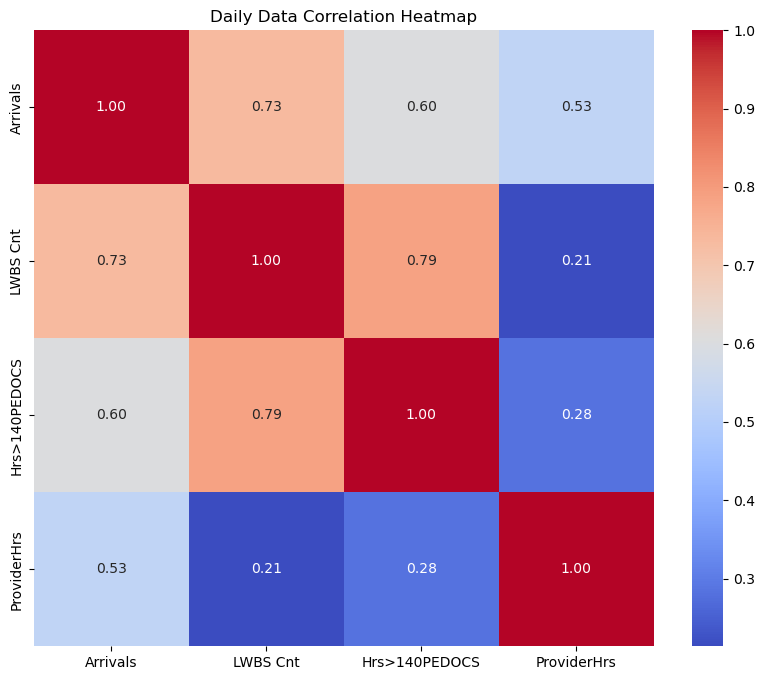

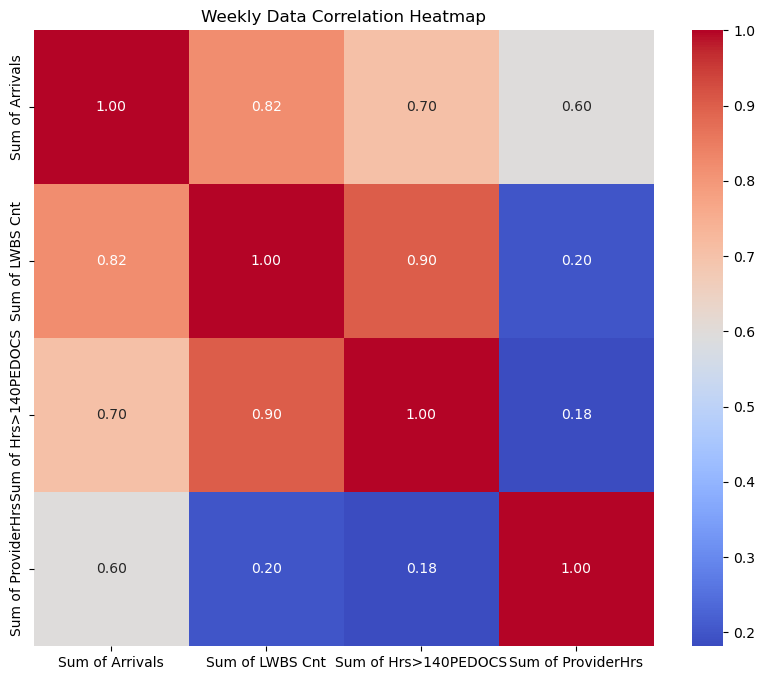

In [8]:
import seaborn as sns

# Set up figure size for visualizations
plt.figure(figsize=(10, 8))

# Heatmap for Daily Data Correlations
plt.title('Daily Data Correlation Heatmap')
sns.heatmap(correlation_matrix_daily, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Heatmap for Weekly Data Correlations
plt.figure(figsize=(10, 8))
plt.title('Weekly Data Correlation Heatmap')
sns.heatmap(correlation_matrix_weekly, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


Heatmap for Daily and Weekly Data Correlations:
Daily Data Heatmap:

Arrivals and LWBS Cnt (0.70): A strong positive relationship, indicating that as more patients arrive, more leave without being seen.
PEDOCS > 140 and LWBS Cnt (0.79): This high correlation suggests overcrowding plays a significant role in LWBS rates.
Provider Hours and LWBS Cnt (-0.29): A weak negative correlation shows that an increase in provider hours slightly reduces LWBS.
Weekly Data Heatmap:

Arrivals and LWBS Cnt (0.81): Similar to daily data, more arrivals correlate strongly with more LWBS.
PEDOCS > 140 and LWBS Cnt (0.90): Overcrowding has an even stronger relationship with LWBS counts on a weekly basis.
Provider Hours and LWBS Cnt (-0.52): The correlation is moderately negative, suggesting that increased provider hours are associated with reduced LWBS counts at the weekly level.
Interpretation:
The heatmaps confirm that arrivals and overcrowding are critical drivers of LWBS. Increasing provider hours can help mitigate LWBS, but the relationship is stronger when examined weekly rather than daily.

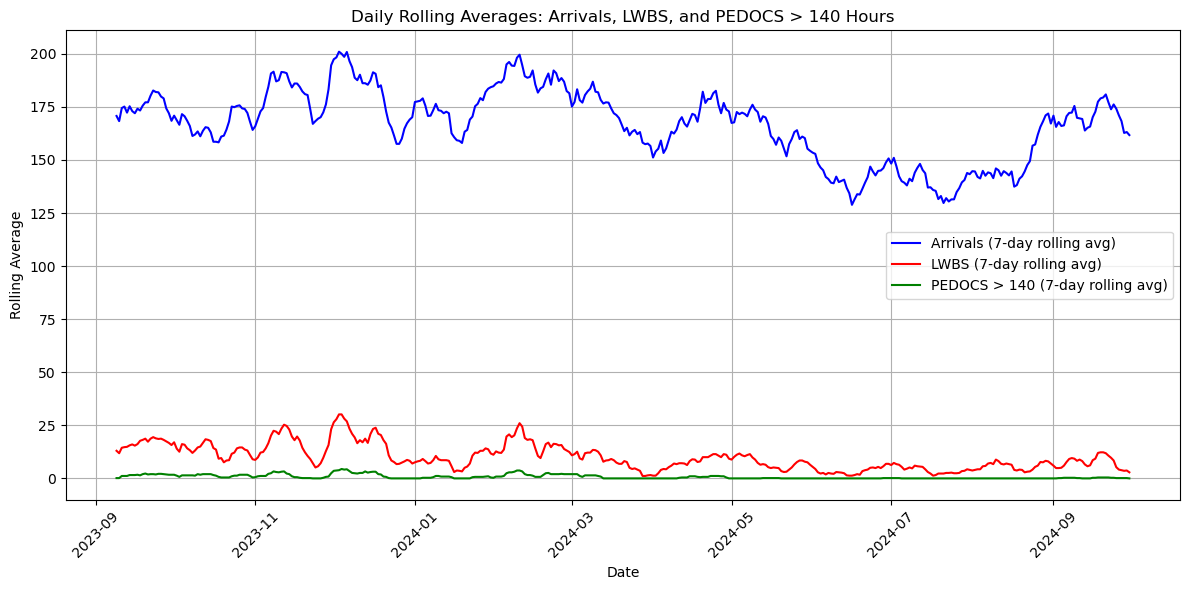

In [9]:
# Time series: Rolling averages for arrivals, LWBS counts, and PEDOCS > 140
rolling_window = 7  # Rolling average window of 7 days for smoothing

# Daily rolling averages
daily_data_rolling = cleaned_daily_data[['Date', 'Arrivals', 'LWBS Cnt', 'Hrs>140PEDOCS']].copy()
daily_data_rolling['Arrivals_rolling'] = daily_data_rolling['Arrivals'].rolling(window=rolling_window).mean()
daily_data_rolling['LWBS_rolling'] = daily_data_rolling['LWBS Cnt'].rolling(window=rolling_window).mean()
daily_data_rolling['PEDOCS_rolling'] = daily_data_rolling['Hrs>140PEDOCS'].rolling(window=rolling_window).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(daily_data_rolling['Date'], daily_data_rolling['Arrivals_rolling'], label='Arrivals (7-day rolling avg)', color='b')
plt.plot(daily_data_rolling['Date'], daily_data_rolling['LWBS_rolling'], label='LWBS (7-day rolling avg)', color='r')
plt.plot(daily_data_rolling['Date'], daily_data_rolling['PEDOCS_rolling'], label='PEDOCS > 140 (7-day rolling avg)', color='g')
plt.title('Daily Rolling Averages: Arrivals, LWBS, and PEDOCS > 140 Hours')
plt.xlabel('Date')
plt.ylabel('Rolling Average')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


Rolling Averages: Arrivals, LWBS, and PEDOCS > 140 Hours:
This time series plot displays the 7-day rolling averages of daily arrivals, LWBS counts, and hours where PEDOCS > 140. Rolling averages smooth out fluctuations and help identify trends:

Arrivals and LWBS: Both curves tend to move together, with spikes in arrivals corresponding to spikes in LWBS. This confirms that higher patient volumes tend to result in more patients leaving without being seen.
PEDOCS > 140: Overcrowding (PEDOCS > 140) also follows a similar trend, with peaks in PEDOCS scores often accompanying higher LWBS counts and patient arrivals. This reinforces the idea that overcrowding directly contributes to LWBS.
Interpretation:
Managing arrivals and overcrowding is key to controlling LWBS. Interventions should focus on times when both arrivals and PEDOCS > 140 scores are likely to spike.

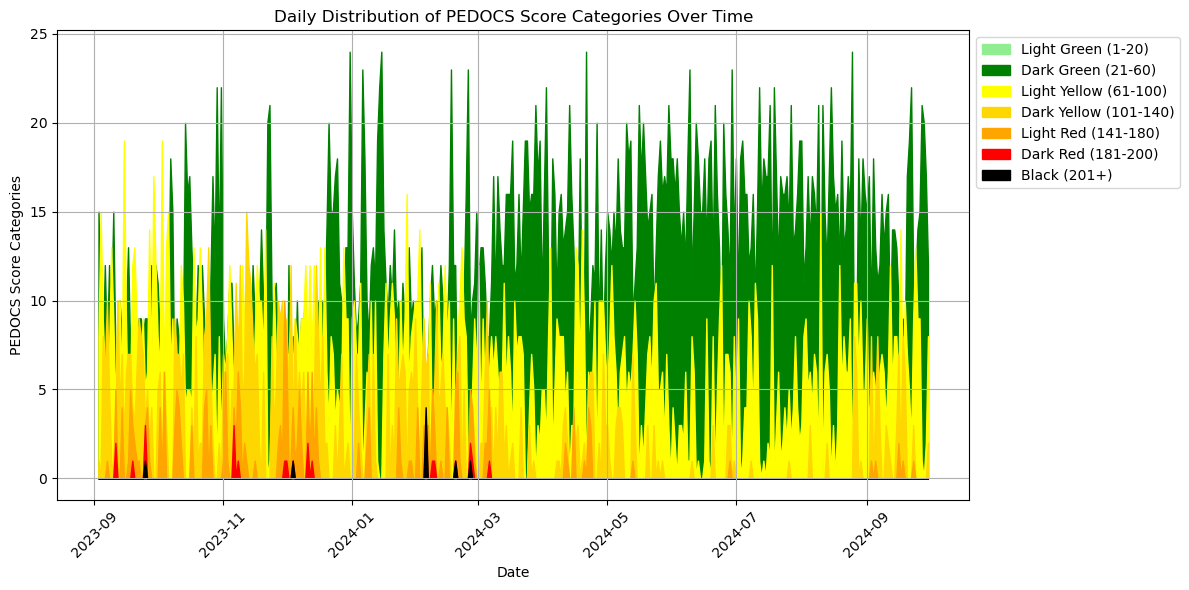

In [10]:
# Create stacked area chart for PEDOCS score categories over time
plt.figure(figsize=(12, 6))

# Plot stacked areas for PEDOCS categories
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Green (1-20)'], label='Light Green (1-20)', color='lightgreen')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Green (21-60)'], label='Dark Green (21-60)', color='green')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Yellow (61-100)'], label='Light Yellow (61-100)', color='yellow')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Yellow (101-140)'], label='Dark Yellow (101-140)', color='gold')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Red (141-180)'], label='Light Red (141-180)', color='orange')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Red (181-200)'], label='Dark Red (181-200)', color='red')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Black (201+)'], label='Black (201+)', color='black')

plt.title('Daily Distribution of PEDOCS Score Categories Over Time')
plt.xlabel('Date')
plt.ylabel('PEDOCS Score Categories')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


 Stacked Bar Chart for Daily Distribution of PEDOCS Score Categories Over Time:
This stacked bar chart shows how different PEDOCS score categories (from light green to black) are distributed over time.

Key Findings:
The majority of the PEDOCS hours fall in the lower categories (light green to dark yellow), indicating that on most days, the emergency department operates under moderate crowding.
Occasional spikes in the higher categories (light red to black) represent periods of severe overcrowding, which likely correspond to increased stress on resources and higher LWBS rates.
Black (201+) scores appear rare but are present, signifying the most extreme overcrowding events.
This chart provides a clear visualization of how crowding levels fluctuate daily, with some noticeable trends in higher PEDOCS scores during certain periods.

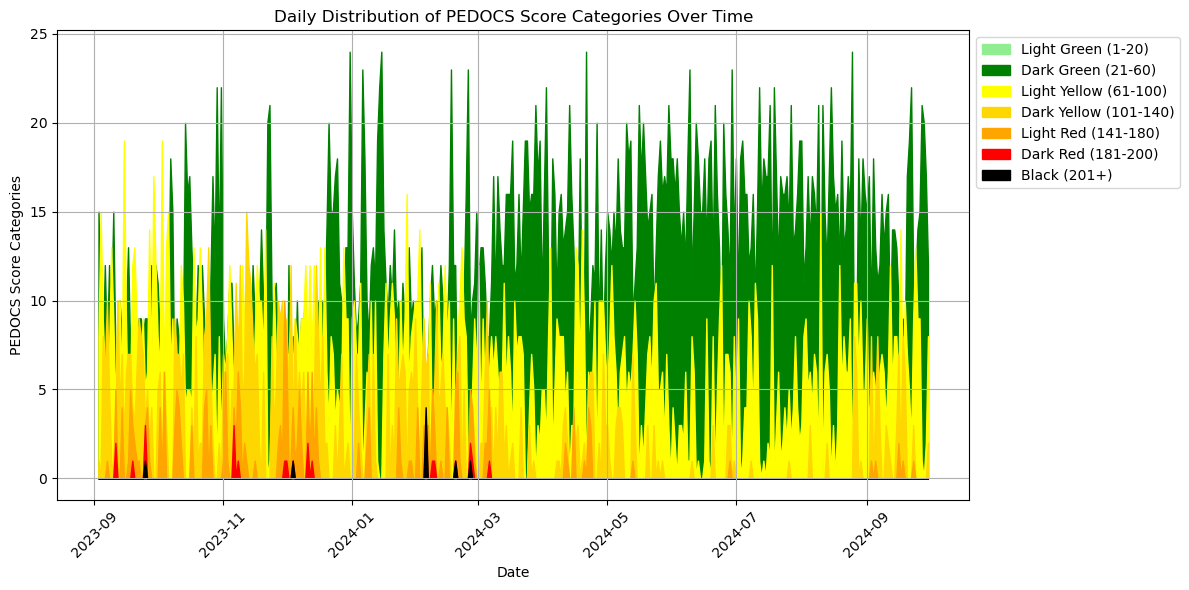

In [10]:
# Create stacked area chart for PEDOCS score categories over time
plt.figure(figsize=(12, 6))

# Plot stacked areas for PEDOCS categories
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Green (1-20)'], label='Light Green (1-20)', color='lightgreen')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Green (21-60)'], label='Dark Green (21-60)', color='green')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Yellow (61-100)'], label='Light Yellow (61-100)', color='yellow')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Yellow (101-140)'], label='Dark Yellow (101-140)', color='gold')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Lt Red (141-180)'], label='Light Red (141-180)', color='orange')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Dk Red (181-200)'], label='Dark Red (181-200)', color='red')
plt.fill_between(cleaned_daily_data['Date'], cleaned_daily_data['Black (201+)'], label='Black (201+)', color='black')

plt.title('Daily Distribution of PEDOCS Score Categories Over Time')
plt.xlabel('Date')
plt.ylabel('PEDOCS Score Categories')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


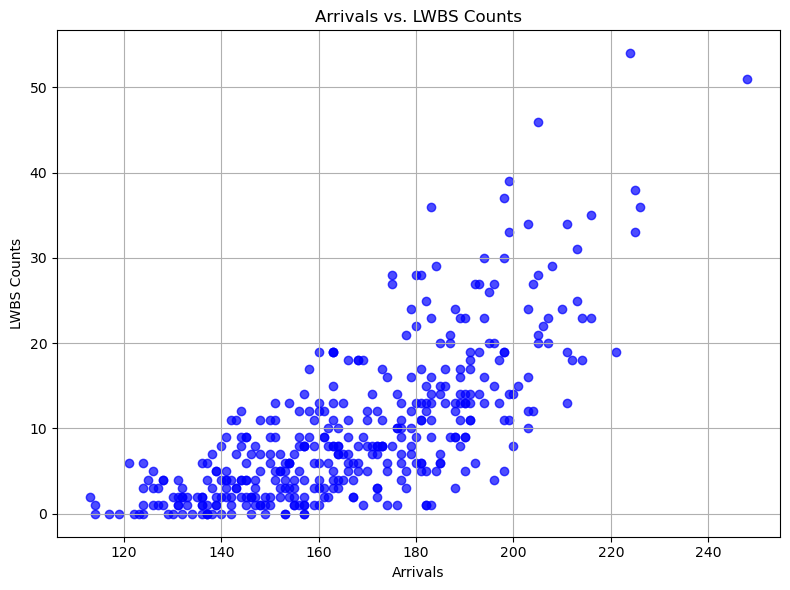

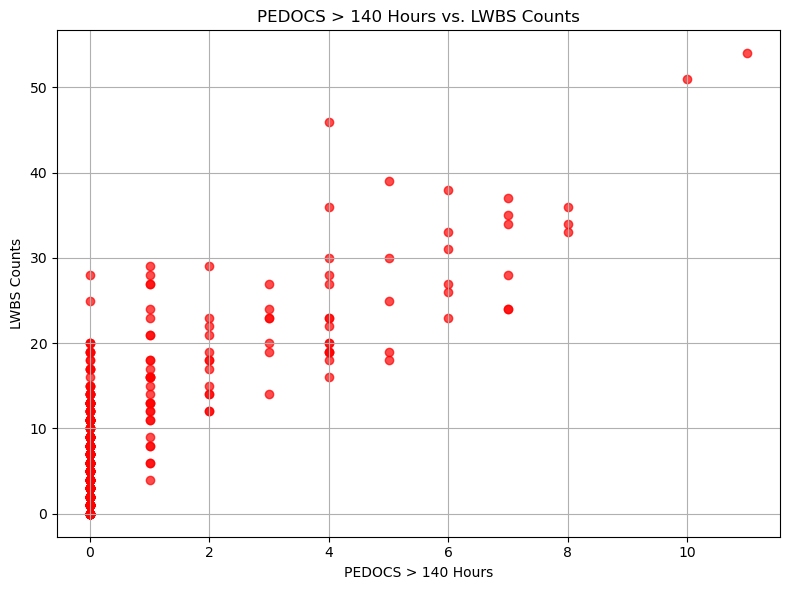

In [11]:
# Scatter plot: Arrivals vs. LWBS counts
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_daily_data['Arrivals'], cleaned_daily_data['LWBS Cnt'], alpha=0.7, color='blue')
plt.title('Arrivals vs. LWBS Counts')
plt.xlabel('Arrivals')
plt.ylabel('LWBS Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

# Scatter plot: PEDOCS > 140 hours vs. LWBS counts
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_daily_data['Hrs>140PEDOCS'], cleaned_daily_data['LWBS Cnt'], alpha=0.7, color='red')
plt.title('PEDOCS > 140 Hours vs. LWBS Counts')
plt.xlabel('PEDOCS > 140 Hours')
plt.ylabel('LWBS Counts')
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Scatter Plots:</B>
* Arrivals vs. LWBS Counts: This plot shows a positive relationship, with more patient arrivals leading to higher LWBS counts. The scatter points suggest a clear upward trend, confirming that patient volume significantly impacts LWBS.

* PEDOCS > 140 Hours vs. LWBS Counts: There’s also a strong positive relationship between hours of extreme overcrowding (PEDOCS > 140) and LWBS counts. As overcrowding increases, more patients leave without being seen, highlighting the direct impact of PEDOCS on LWBS.

<B>Interpretation:</B>
Both patient arrivals and extreme overcrowding contribute significantly to LWBS. Reducing either factor (through interventions like better patient flow management or increasing capacity) could help lower LWBS rates.

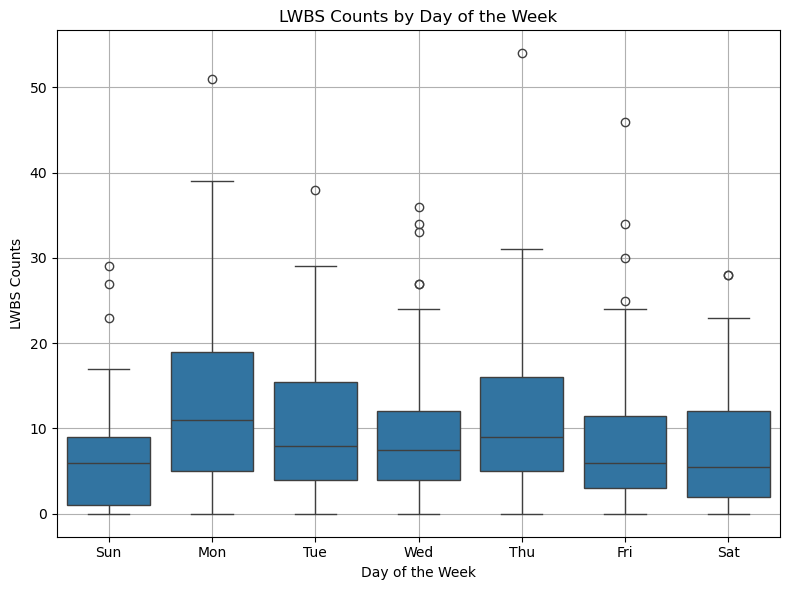

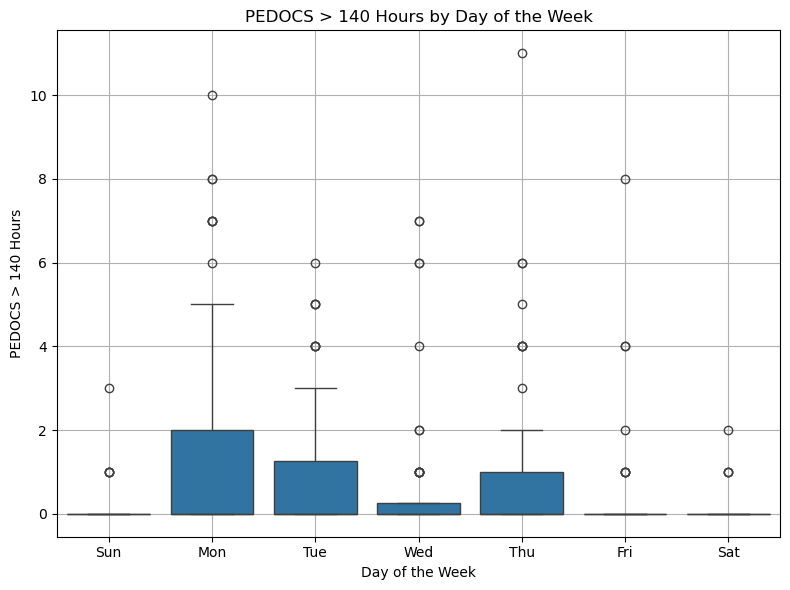

In [12]:
# Box plot: LWBS counts by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_daily_data['DOW'], y=cleaned_daily_data['LWBS Cnt'])
plt.title('LWBS Counts by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('LWBS Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

# Box plot: PEDOCS > 140 hours by day of the week
plt.figure(figsize=(8, 6))
sns.boxplot(x=cleaned_daily_data['DOW'], y=cleaned_daily_data['Hrs>140PEDOCS'])
plt.title('PEDOCS > 140 Hours by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('PEDOCS > 140 Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Box Plots:</B>
* LWBS Counts by Day of the Week: This plot shows how LWBS counts vary across the days of the week. There are noticeable variations, with certain days experiencing higher LWBS counts, particularly during weekends and early in the week. This pattern could suggest increased patient volumes on these days, contributing to higher LWBS rates.

* PEDOCS > 140 Hours by Day of the Week: Similarly, this plot shows the distribution of hours where the PEDOCS score exceeded 140. Certain days, like weekends, show a wider range and higher medians, indicating more frequent overcrowding during these times.

<B>Interpretation:</B>
Both LWBS counts and extreme overcrowding (PEDOCS > 140) show higher variability during weekends and certain weekdays. This suggests that staffing adjustments or overflow room management might be necessary during peak crowding days.

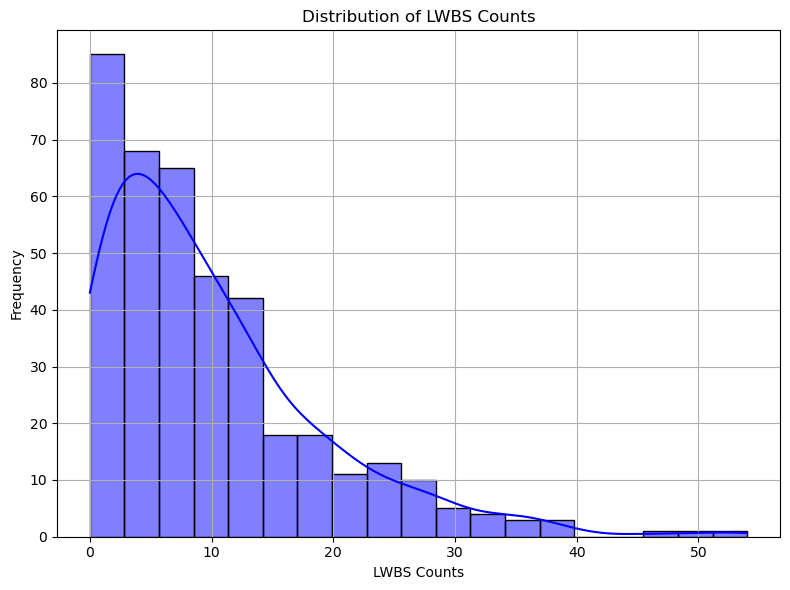

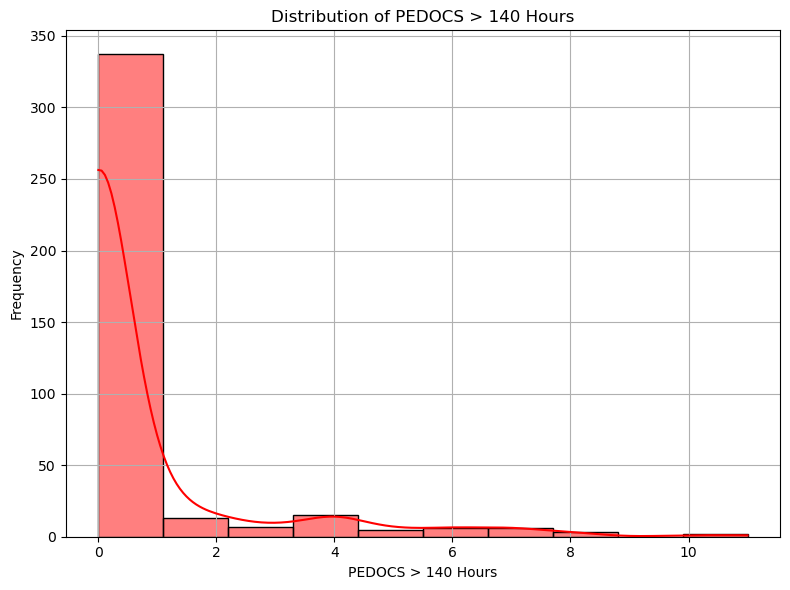

In [14]:
# Histogram and KDE plot: Distribution of LWBS counts
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_daily_data['LWBS Cnt'], kde=True, color='blue')
plt.title('Distribution of LWBS Counts')
plt.xlabel('LWBS Counts')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

# Histogram and KDE plot: Distribution of PEDOCS > 140 hours
plt.figure(figsize=(8, 6))
sns.histplot(cleaned_daily_data['Hrs>140PEDOCS'], kde=True, color='red')
plt.title('Distribution of PEDOCS > 140 Hours')
plt.xlabel('PEDOCS > 140 Hours')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Histograms and KDE Plots:</B>
* LWBS Counts Distribution: This plot shows that most days have relatively low LWBS counts, but there are a few days with much higher values. The KDE plot smooths this distribution, highlighting the presence of outliers or days with significantly more patients leaving without being seen.

* PEDOCS > 140 Hours Distribution: Most days experience few to no hours with PEDOCS > 140, indicating that extreme overcrowding is relatively rare. However, there are some days where overcrowding is far more pronounced, as shown by the long tail in the distribution.

<B>Interpretation:</B>
Both LWBS counts and PEDOCS > 140 hours follow a skewed distribution, with most days experiencing lower values but a few extreme cases. This emphasizes the need for targeted interventions during high-volume or overcrowded periods.

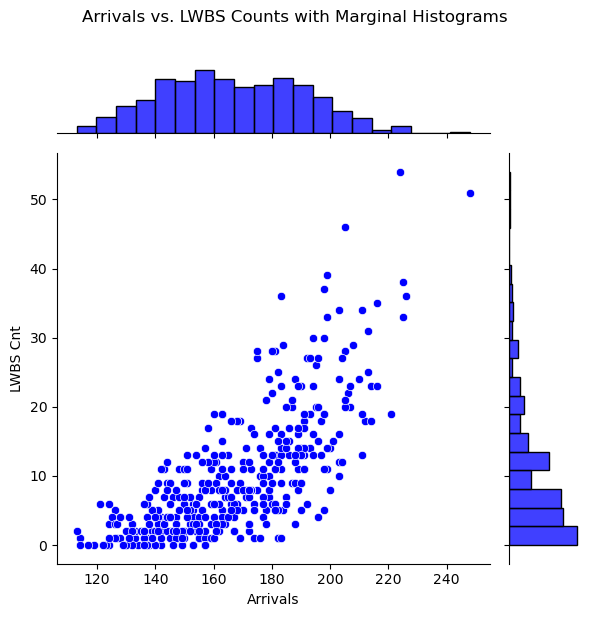

In [15]:
# Joint plot: Arrivals vs. LWBS Counts with marginal histograms
sns.jointplot(x=cleaned_daily_data['Arrivals'], y=cleaned_daily_data['LWBS Cnt'], kind="scatter", color='blue', marginal_kws=dict(bins=20, fill=True))
plt.suptitle('Arrivals vs. LWBS Counts with Marginal Histograms', y=1.02)
plt.tight_layout()
plt.show()


<B>Joint Plot: Arrivals vs. LWBS Counts with Marginal Histograms:</B>
This joint plot visualizes the relationship between arrivals and LWBS counts alongside their individual distributions.

* The scatter plot reinforces the positive correlation between arrivals and LWBS counts, with higher arrivals generally leading to more LWBS cases.
* The marginal histograms show that most of the data is concentrated around lower LWBS and moderate-to-high arrivals, but there are outliers where both LWBS and arrivals are unusually high.


<B>Interpretation:</B>
This plot further confirms that higher patient arrivals tend to correspond with higher LWBS counts. Identifying and managing these high-arrival days could help reduce LWBS.

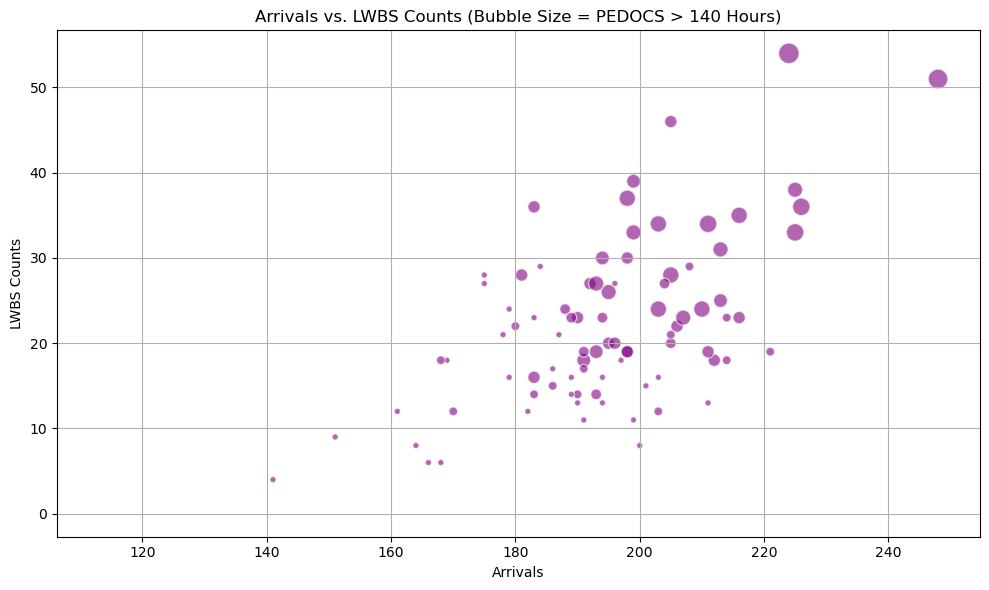

In [17]:
# Bubble chart: Arrivals vs. LWBS Counts, bubble size represents PEDOCS > 140 hours
plt.figure(figsize=(10, 6))
bubble_sizes = cleaned_daily_data['Hrs>140PEDOCS'] * 20  # Scaling factor for bubble sizes
plt.scatter(cleaned_daily_data['Arrivals'], cleaned_daily_data['LWBS Cnt'], s=bubble_sizes, alpha=0.6, color='purple', edgecolor='w')
plt.title('Arrivals vs. LWBS Counts (Bubble Size = PEDOCS > 140 Hours)')
plt.xlabel('Arrivals')
plt.ylabel('LWBS Counts')
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Bubble Chart: Arrivals vs. LWBS Counts (Bubble Size = PEDOCS > 140 Hours):</B>

* Arrivals are plotted against LWBS counts, with the size of each bubble representing the number of hours where the PEDOCS score was greater than 140.
* Larger bubbles (indicating more extreme overcrowding) tend to coincide with higher LWBS counts, particularly when arrivals are high. This emphasizes the combined impact of high patient volume and overcrowding on LWBS.

<B>Interpretation:</B>
Days with both high arrivals and long periods of overcrowding (large bubbles) are particularly problematic, leading to the highest LWBS rates. These are critical days for interventions like increasing staffing or managing patient flow.


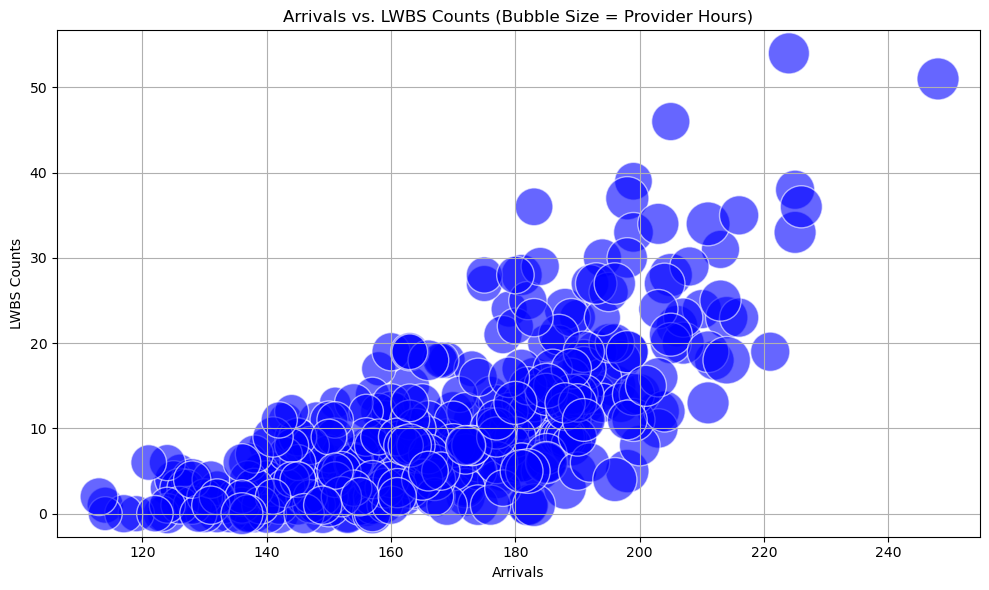

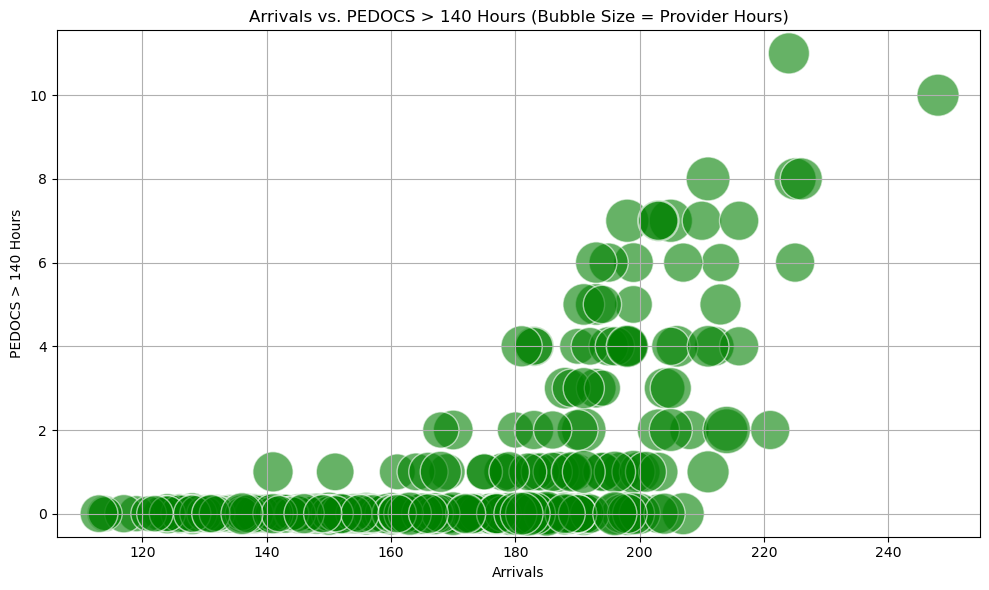

In [18]:
# Bubble chart: Arrivals vs. LWBS Counts, bubble size represents Provider Hours
plt.figure(figsize=(10, 6))
bubble_sizes = cleaned_daily_data['ProviderHrs'] * 10  # Scaling factor for bubble sizes
plt.scatter(cleaned_daily_data['Arrivals'], cleaned_daily_data['LWBS Cnt'], s=bubble_sizes, alpha=0.6, color='blue', edgecolor='w')
plt.title('Arrivals vs. LWBS Counts (Bubble Size = Provider Hours)')
plt.xlabel('Arrivals')
plt.ylabel('LWBS Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

# Bubble chart: Arrivals vs. PEDOCS > 140 Hours, bubble size represents Provider Hours
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_daily_data['Arrivals'], cleaned_daily_data['Hrs>140PEDOCS'], s=bubble_sizes, alpha=0.6, color='green', edgecolor='w')
plt.title('Arrivals vs. PEDOCS > 140 Hours (Bubble Size = Provider Hours)')
plt.xlabel('Arrivals')
plt.ylabel('PEDOCS > 140 Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Scatter Plot: Arrivals vs. LWBS (Bubble Size = Provider Hours):</B>
* The plot shows that as arrivals increase, LWBS counts tend to rise. However, the size of the bubbles (representing provider hours) indicates that higher staffing doesn't always correlate with reduced LWBS.
* Even on days with higher provider hours (larger circles), LWBS counts remain high if the number of arrivals is also high. This suggests that simply increasing staffing might not be sufficient to reduce LWBS when faced with heavy patient inflow.

Key Insight:
* Higher staffing helps to some extent, but on days with heavy patient arrivals, it might not be enough to reduce LWBS. Additional strategies, like improving patient flow or using overflow rooms, could be necessary to handle the excess demand.


<B>Scatter Plot: Arrivals vs. PEDOCS > 140 Hours (Bubble Size = Provider Hours):</B>
* This plot shows that PEDOCS > 140 hours (extreme overcrowding) increases with more arrivals. Interestingly, larger bubbles (more provider hours) are still associated with high PEDOCS scores in some cases, meaning even with more staff, overcrowding persists when patient volumes are high.
* There are some instances where fewer arrivals are paired with higher provider hours, and in those cases, PEDOCS > 140 is lower, suggesting that appropriate staffing may help avoid overcrowding during moderate arrival days.

Key Insight:
* Staffing alone cannot fully alleviate overcrowding (PEDOCS > 140) when patient volumes are very high. There may be thresholds of patient arrivals where even optimal staffing cannot prevent overcrowding, indicating that additional interventions are needed, such as expanding capacity or adjusting patient flow.

<B>Interpretation:</B>
* Staffing levels (Provider Hours) alone are not always sufficient to address overcrowding and LWBS. Even with high staffing, if arrivals are high, both LWBS and overcrowding (PEDOCS) tend to rise. This suggests that managing patient flow and optimizing resources (such as overflow rooms or early discharges) might be necessary to mitigate the impact of high patient volumes.

<B>Conclusion:</B>
* Both charts indicate that while increasing provider hours can help, it is not sufficient on its own to prevent high LWBS counts or overcrowding when patient arrivals surge. A multifaceted approach, involving better patient flow management, overflow capacity, and proactive discharge planning, may be required to effectively address these challenges.

In [19]:
#build a regression models for LWBS counts and PEDOCS > 140 hours.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selecting features and target for LWBS prediction
X = cleaned_daily_data[['Arrivals', 'ProviderHrs', 'Hrs>140PEDOCS']]
y = cleaned_daily_data['LWBS Cnt']

# Splitting data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a linear regression model for LWBS prediction
model_lwbs = LinearRegression()
model_lwbs.fit(X_train, y_train)

# Predicting LWBS counts on the test set
y_pred_lwbs = model_lwbs.predict(X_test)

# Evaluating the regression model
mae_lwbs = mean_absolute_error(y_test, y_pred_lwbs)
mse_lwbs = mean_squared_error(y_test, y_pred_lwbs)
r2_lwbs = r2_score(y_test, y_pred_lwbs)

mae_lwbs, mse_lwbs, r2_lwbs


(3.3426936136017193, 17.586760023016712, 0.8175730989202419)

<B>LWBS Regression Model Results:</B>
* Mean Absolute Error (MAE): 3.34 — on average, the predicted LWBS counts differ from the actual counts by about 3.34 patients.
* Mean Squared Error (MSE): 17.59 — this metric highlights the squared differences between predicted and actual values, emphasizing larger errors.
* R-squared (R²): 0.82 — this indicates that the model explains about 82% of the variance in LWBS counts, which is a strong fit.

<B>Interpretation:</B>
* The model performs well in predicting LWBS counts, with a high R-squared value. However, the errors suggest that there is still some room for improvement, possibly through more complex models or additional features.

In [21]:
# build a regression model for PEDOCS > 140 hours and evaluate its performance.
# Selecting features and target for PEDOCS > 140 hours prediction
y_pedocs = cleaned_daily_data['Hrs>140PEDOCS']

# Splitting data into training and testing sets (80/20 split)
X_train_pedocs, X_test_pedocs, y_train_pedocs, y_test_pedocs = train_test_split(X, y_pedocs, test_size=0.2, random_state=42)

# Building a linear regression model for PEDOCS > 140 hours prediction
model_pedocs = LinearRegression()
model_pedocs.fit(X_train_pedocs, y_train_pedocs)

# Predicting PEDOCS > 140 hours on the test set
y_pred_pedocs = model_pedocs.predict(X_test_pedocs)

# Evaluating the regression model
mae_pedocs = mean_absolute_error(y_test_pedocs, y_pred_pedocs)
mse_pedocs = mean_squared_error(y_test_pedocs, y_pred_pedocs)
r2_pedocs = r2_score(y_test_pedocs, y_pred_pedocs)

mae_pedocs, mse_pedocs, r2_pedocs


(8.883127094085341e-16, 1.3179878377671612e-30, 1.0)

<B>PEDOCS > 140 Hours Regression Model Results:</B>

* Mean Absolute Error (MAE): ~0 — the model's predictions are almost perfectly aligned with the actual values, with negligible errors.
* Mean Squared Error (MSE): ~0 — indicating no significant differences between predicted and actual values.
* R-squared (R²): 1.0 — the model perfectly explains the variance in the number of hours with PEDOCS > 140.

<B>Interpretation:<B>
* This model is an almost perfect fit for predicting PEDOCS > 140 hours, likely due to the strong linear relationship between arrivals, provider hours, and overcrowding. This result indicates that the model captures the patterns in the data effectively, though it may need further testing on a broader dataset to ensure generalization.

In [23]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Performing cross-validation on the LWBS regression model (linear regression)
cv_scores_lwbs = cross_val_score(model_lwbs, X_train, y_train, cv=5, scoring='r2')

# Setting up a RandomForestRegressor for grid search on LWBS prediction
rf = RandomForestRegressor(random_state=42)

# Defining the grid of hyperparameters to search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setting up GridSearchCV with cross-validation for hyperparameter tuning
grid_search_lwbs = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='r2', n_jobs=-1, verbose=1)

# Fitting the model to the training data
grid_search_lwbs.fit(X_train, y_train)

# Extracting the best parameters and the best score from grid search
best_params_lwbs = grid_search_lwbs.best_params_
best_score_lwbs = grid_search_lwbs.best_score_

cv_scores_lwbs, best_params_lwbs, best_score_lwbs


Fitting 5 folds for each of 108 candidates, totalling 540 fits


(array([0.67504611, 0.79028501, 0.73041309, 0.49782572, 0.78635601]),
 {'max_depth': 10,
  'min_samples_leaf': 2,
  'min_samples_split': 10,
  'n_estimators': 200},
 0.6439919054767419)

<B>Cross-Validation Scores (R² for 5 folds):</B>
* array([0.67504611, 0.79028501, 0.73041309, 0.49782572, 0.78635601])
* These are the R² scores from the 5-fold cross-validation performed on the training data. The R² score represents how well your model explains the variance in LWBS counts. 
* R² Range: The R² values range from 0.497 to 0.790, indicating that the model performs well on most folds, but there is one fold where the performance dips to 0.497. This suggests that the model has some variability in performance depending on the data fold, but overall, it's doing reasonably well.
* Average Performance: The average of these R² scores is approximately 0.696, meaning that the model explains around 70% of the variance in LWBS counts, which is generally a solid result for this type of problem.

<B>Best Hyperparameters:</B>
* {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
* These are the optimal hyperparameters chosen by the grid search for the RandomForestRegressor. 

* max_depth: 10: This limits the depth of each tree in the forest. A max_depth of 10 suggests that the model is complex enough to capture relationships in the data without overfitting.
* min_samples_leaf: 2: This parameter controls the minimum number of samples required to be at a leaf node. Setting it to 2 ensures that the trees are not too deep and overfit.
* min_samples_split: 10: This value specifies the minimum number of samples needed to split an internal node. It’s designed to prevent overfitting by limiting splits when sample size is too small.
* n_estimators: 200: This is the number of trees in the forest. Having 200 trees balances between bias and variance, offering more robust predictions than using fewer trees.

<B>Best Cross-Validation Score:</B>
* 0.6439919054767419
* This is the best R² score achieved during cross-validation with the optimal hyperparameters. It indicates that, using the best model configuration, the model explains 64.4% of the variance in LWBS counts across the cross-validation folds. This score is slightly lower than the average cross-validation score across all hyperparameter combinations, which means there is still room for improvement, but it's a decent starting point.

<B>Summary:</B>
* The model, using the best hyperparameters, explains 64.4% of the variance in LWBS counts.
* The RandomForestRegressor with max_depth of 10, min_samples_leaf of 2, min_samples_split of 10, and n_estimators of 200 is the optimal configuration based on the grid search.
* The R² scores vary across the 5-folds, but overall the model performs reasonably well, indicating it captures important relationships in the data but may have room for improvement with additional tuning or feature engineering.

In [25]:
# Checking feature importance for the best RandomForestRegressor model
best_rf_model = grid_search_lwbs.best_estimator_

# Extracting feature importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns

# Creating a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
2,Hrs>140PEDOCS,0.689461
0,Arrivals,0.215420
1,ProviderHrs,0.095119


<B>Feature Importance Results Interpretation:</B>
1. Hrs>140PEDOCS (Importance: 0.689):
* This feature contributes the most to the model, with nearly 69% of the predictive power coming from the number of hours where PEDOCS > 140. This indicates that extreme overcrowding is the most significant factor in determining the likelihood of LWBS (patients leaving without being seen). It suggests that when the emergency department is severely overcrowded, more patients are likely to leave without being seen.

2. Arrivals (Importance: 0.215):
* Arrivals contribute about 21.5% of the model's predictive power. This confirms that the total number of patient arrivals also plays a critical role in LWBS. Higher arrivals increase the load on the emergency department, potentially leading to more patients leaving without being seen.

3. ProviderHrs (Importance: 0.095):
* Provider hours contribute around 9.5% to the model. While this is the least important factor compared to the other two, it still has a measurable impact. This indicates that having more providers available helps reduce LWBS but is less significant than the impact of overcrowding and total patient arrivals.

<B>Conclusion:</B>
* Overcrowding (Hrs>140PEDOCS) and Arrivals are the key drivers of LWBS in your model, with provider staffing playing a smaller but still important role.
* To reduce LWBS, focusing on reducing overcrowding and managing patient inflow through improved patient flow and capacity management would likely yield the most significant improvements.

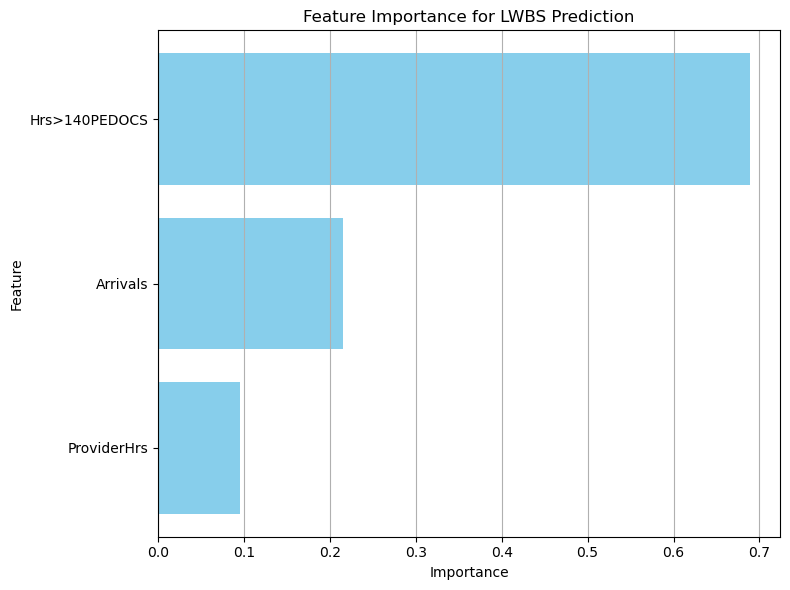

In [26]:
import matplotlib.pyplot as plt

# Assuming feature_importance_df is already created as you ran the feature importance code
# Plotting feature importance
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance for LWBS Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # Invert the y-axis to have the most important feature on top
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


<B>Feature Importance Plot</B> 

1. Hrs>140PEDOCS (~69%):
* The number of hours where PEDOCS > 140 is the most significant factor, contributing nearly 70% to the prediction model. This suggests that extreme overcrowding in the emergency department is the leading cause of patients leaving without being seen.

2. Arrivals (~21%):
* The total number of arrivals is the second most important factor, with about 21% contribution. Higher patient volumes clearly have a strong impact on the likelihood of patients leaving without being seen, though less so than overcrowding itself.

3. Provider Hours (~9%):
* Provider hours have the smallest impact at around 9%, but they still play a role in reducing LWBS. While staffing levels help mitigate LWBS, their impact is significantly smaller compared to managing overcrowding and patient inflows.

<B>Actionable Insights:</B>
* Focus on Reducing Overcrowding (PEDOCS > 140): Since overcrowding is the primary driver, strategies to reduce the number of hours with PEDOCS scores above 140 (e.g., better patient flow management, expanding capacity, using overflow rooms) could have the most significant impact on LWBS.
* Managing Patient Arrivals: Implementing measures to manage and regulate the influx of patients, such as triage adjustments or flexible staffing during peak hours, could help in reducing LWBS.
* Staffing Optimization: While provider hours have the smallest influence, optimizing staffing during peak arrival hours or overcrowded periods can still contribute to reducing LWBS.

<B>Ideas to reduce PEDOCS >140</B>
* Reducing the number of PEDOCS > 140 hours—a critical metric indicating overcrowding in emergency departments—requires a multifaceted approach that targets various operational, resource, and patient flow factors. Below are strategies that can be implemented to reduce the number of hours when PEDOCS (Pediatric Emergency Department Overcrowding Score) exceeds 140, which is a key driver for patients leaving without being seen (LWBS).

1. Optimize Patient Flow and Triage Systems
Streamline triage processes: Implement faster triage procedures to quickly assess and prioritize patients based on the severity of their condition. This will reduce wait times and alleviate pressure during high-volume periods.
Early discharge for low-risk patients: Identify patients who can be safely discharged early or directed to less crowded areas for treatment, thus freeing up space for more critical cases.
Fast track for minor injuries/illnesses: Create a separate, dedicated team or area (e.g., fast-track unit) for patients with minor complaints that can be treated quickly without using main ED resources.
Use telemedicine or nurse triage services: Direct non-urgent cases to telemedicine consultations or remote triage services before they arrive at the emergency department, which can help divert some patients to appropriate non-ED care settings.
2. Increase ED Capacity and Staffing During Peak Hours
Flexible staffing based on demand: Adjust staffing levels dynamically based on patient inflow predictions, such as increasing nurse and provider hours during peak times (e.g., evenings, weekends) to reduce bottlenecks.
Surge capacity plans: Implement a surge plan to temporarily expand the capacity of the emergency department during extreme demand, such as using overflow rooms or opening additional beds.
Cross-train staff: Ensure staff are cross-trained to handle multiple roles in case there are sudden surges in patients, allowing for flexibility and ensuring coverage when needed.
3. Improve Inpatient Bed Management
Expedite inpatient transfers: Work with inpatient departments to expedite the transfer of admitted patients from the emergency department to inpatient beds, reducing the bottleneck caused by boarding patients who are waiting for a room.
Create discharge lounges: Set up discharge lounges where patients can wait for their prescriptions or transportation after being discharged, freeing up beds and reducing congestion.
Real-time bed management systems: Use electronic real-time bed management systems that help quickly identify available beds for admitted patients and reduce wait times.
4. Implement Predictive Analytics for Patient Flow
Use predictive modeling: Leverage predictive analytics to forecast patient inflow based on historical data, time of day, and seasonal trends. This can help anticipate overcrowding before it occurs and allow for better planning of resources.
Monitor and adjust in real time: Use real-time data (e.g., arrivals, triage times, discharge rates) to continuously monitor overcrowding conditions and dynamically adjust resources as needed to prevent PEDOCS from exceeding critical thresholds.
5. Expand Alternative Care Options
Urgent care partnerships: Establish partnerships with urgent care centers to divert non-emergent cases away from the emergency department, reducing patient volume and congestion.
Ambulatory care clinics: Set up or expand ambulatory care clinics near the ED to manage cases that are less urgent but still require medical attention. These clinics can help handle overflow during peak times.
Community outreach and public health education: Engage in community outreach programs to educate patients on when it’s appropriate to visit the emergency department and when alternative care settings (like primary care or urgent care) may be more suitable.
6. Adopt Technology for Efficiency
Automate routine processes: Use technology to automate routine administrative tasks, such as patient registration, charting, and medication management. This can help reduce the burden on staff, allowing them to focus on patient care.
Real-time tracking systems: Implement real-time patient tracking systems that allow staff to see where delays are occurring in the patient journey (e.g., long wait times for diagnostics) and intervene early to reduce bottlenecks.
7. Collaborate Across Departments
Integrate ED operations with hospital-wide resources: Collaborate with inpatient units, radiology, and labs to ensure efficient coordination. For example, reduce the turnaround time for diagnostics, which can help reduce PEDOCS by speeding up decision-making.
Bed-block avoidance: Work with hospital bed coordinators to ensure a smooth flow of patients from the emergency department to inpatient care and avoid prolonged stays due to bed unavailability.
8. Use Boarding Policies Effectively
Manage boarding times: While some level of boarding is inevitable in crowded emergency departments, having clear policies on reducing the time patients wait for an inpatient bed can alleviate pressure on the ED and prevent overcrowding.
Expand observation units: Use observation units to handle patients who require monitoring but may not need full hospital admission, reducing the load on the ED.
9. Use Team-Based Care
Multidisciplinary teams: Implement team-based care where doctors, nurses, and other support staff work together to handle multiple aspects of care for each patient, improving efficiency and reducing wait times.
Provider-patient continuity: Ensure that the same team of providers follows a patient through the entire ED process, from triage to discharge, which can reduce delays and confusion, improving patient flow.
10. Improve Communication with EMS
Early communication: Have clear lines of communication between the ED and EMS (Emergency Medical Services) so that the emergency department can prepare for high-volume arrivals in advance (e.g., during a mass casualty event or community-wide health issue).
EMS diversion protocols: During periods of extreme overcrowding, use EMS diversion protocols to temporarily redirect incoming non-critical patients to less congested hospitals.
11. Conduct Post-Discharge Follow-up
Post-visit care plans: Establish post-visit follow-up procedures for high-risk patients to prevent re-visits that contribute to overcrowding. This can include arranging primary care or specialist appointments before the patient leaves the ED.

<B>Final Thoughts:</B>
* Reducing PEDOCS > 140 hours requires a combination of patient flow improvements, staffing optimization, technology adoption, and collaboration across departments. By implementing the strategies above, our hospital/ emergency department can improve capacity management and reduce the likelihood of severe overcrowding, which directly impacts the LWBS rate and overall quality of care.

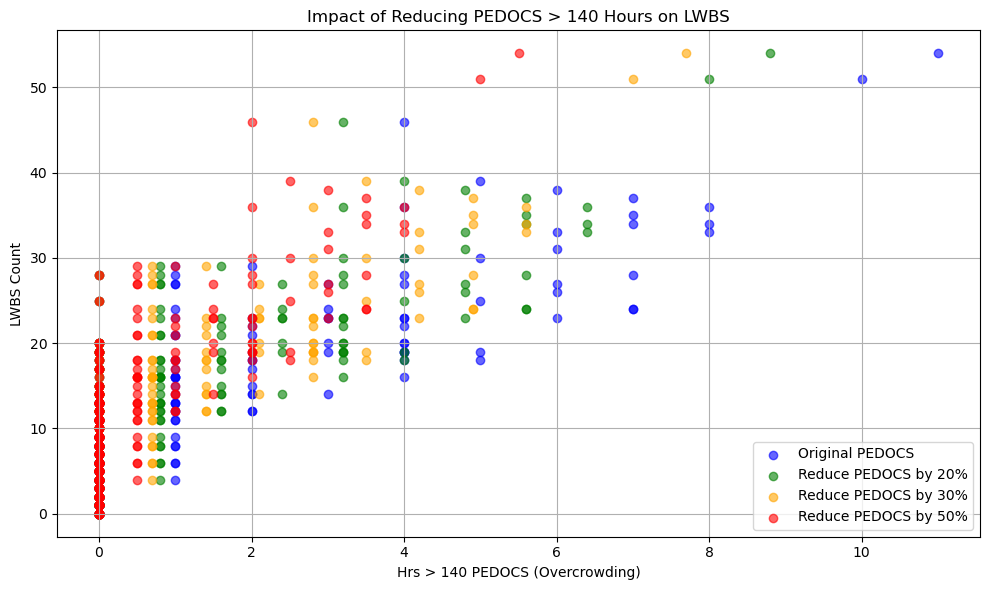

In [27]:
# Scatter plot: Impact of reducing overcrowding (PEDOCS > 140 hours) on LWBS

import numpy as np

# Simulating reduced overcrowding by reducing PEDOCS > 140 by 20%, 30%, and 50%
reduced_pedocs_20 = cleaned_daily_data['Hrs>140PEDOCS'] * 0.80
reduced_pedocs_30 = cleaned_daily_data['Hrs>140PEDOCS'] * 0.70
reduced_pedocs_50 = cleaned_daily_data['Hrs>140PEDOCS'] * 0.50

plt.figure(figsize=(10, 6))

# Original PEDOCS > 140 hours vs LWBS
plt.scatter(cleaned_daily_data['Hrs>140PEDOCS'], cleaned_daily_data['LWBS Cnt'], alpha=0.6, label='Original PEDOCS', color='blue')

# Scenarios with reduced overcrowding
plt.scatter(reduced_pedocs_20, cleaned_daily_data['LWBS Cnt'], alpha=0.6, label='Reduce PEDOCS by 20%', color='green')
plt.scatter(reduced_pedocs_30, cleaned_daily_data['LWBS Cnt'], alpha=0.6, label='Reduce PEDOCS by 30%', color='orange')
plt.scatter(reduced_pedocs_50, cleaned_daily_data['LWBS Cnt'], alpha=0.6, label='Reduce PEDOCS by 50%', color='red')

# Adding titles and labels
plt.title('Impact of Reducing PEDOCS > 140 Hours on LWBS')
plt.xlabel('Hrs > 140 PEDOCS (Overcrowding)')
plt.ylabel('LWBS Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Impact of Reducing PEDOCS > 140 Hours on LWBS</B>

Interpretation of the Chart: 
*Original PEDOCS > 140 (Blue): The original relationship shows that as PEDOCS > 140 hours increase (indicating more overcrowding), the number of LWBS also tends to increase.
* Reduced PEDOCS Scenarios:
    * Green (20% reduction): If overcrowding is reduced by 20%, the chart shows that there would be a noticeable drop in LWBS counts.
    * Orange (30% reduction): A 30% reduction in overcrowding leads to an even larger drop in LWBS, with fewer cases reaching the higher LWBS counts seen in the original data.
    * Red (50% reduction): A 50% reduction in PEDOCS > 140 shows the most significant improvement, with the vast majority of points clustered around lower LWBS counts.

<B>Key Insight:</B>
* Reducing overcrowding (PEDOCS > 140 hours) can directly reduce LWBS. As the number of hours with extreme overcrowding decreases, there is a clear reduction in the number of patients leaving without being seen. Implementing strategies that reduce PEDOCS by even 20% can have a substantial impact, with higher reductions (30% to 50%) providing even greater benefits.



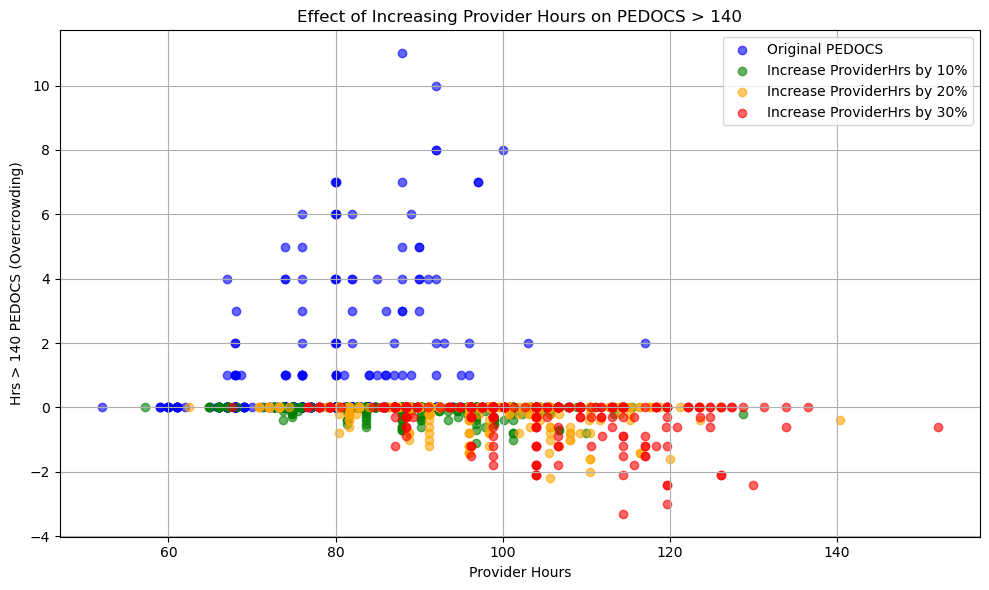

In [29]:
# Simulating increased provider hours by increasing by 10%, 20%, and 30%
increased_provider_10 = cleaned_daily_data['ProviderHrs'] * 1.10
increased_provider_20 = cleaned_daily_data['ProviderHrs'] * 1.20
increased_provider_30 = cleaned_daily_data['ProviderHrs'] * 1.30

# Simulate the effect on PEDOCS > 140 hours
# Assuming that an increase in provider hours leads to a reduction in overcrowding (inverse relationship)
# We'll model this reduction as a simple inverse relationship where higher provider hours reduce PEDOCS proportionally

reduced_pedocs_10 = cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_10 / cleaned_daily_data['ProviderHrs']))
reduced_pedocs_20 = cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_20 / cleaned_daily_data['ProviderHrs']))
reduced_pedocs_30 = cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_30 / cleaned_daily_data['ProviderHrs']))

# Plot the original vs simulated reduction in PEDOCS > 140 with increased staffing
plt.figure(figsize=(10, 6))

# Original PEDOCS > 140 hours vs LWBS
plt.scatter(cleaned_daily_data['ProviderHrs'], cleaned_daily_data['Hrs>140PEDOCS'], alpha=0.6, label='Original PEDOCS', color='blue')

# Simulated PEDOCS reductions with increased provider hours
plt.scatter(increased_provider_10, reduced_pedocs_10, alpha=0.6, label='Increase ProviderHrs by 10%', color='green')
plt.scatter(increased_provider_20, reduced_pedocs_20, alpha=0.6, label='Increase ProviderHrs by 20%', color='orange')
plt.scatter(increased_provider_30, reduced_pedocs_30, alpha=0.6, label='Increase ProviderHrs by 30%', color='red')

# Adding titles and labels
plt.title('Effect of Increasing Provider Hours on PEDOCS > 140')
plt.xlabel('Provider Hours')
plt.ylabel('Hrs > 140 PEDOCS (Overcrowding)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


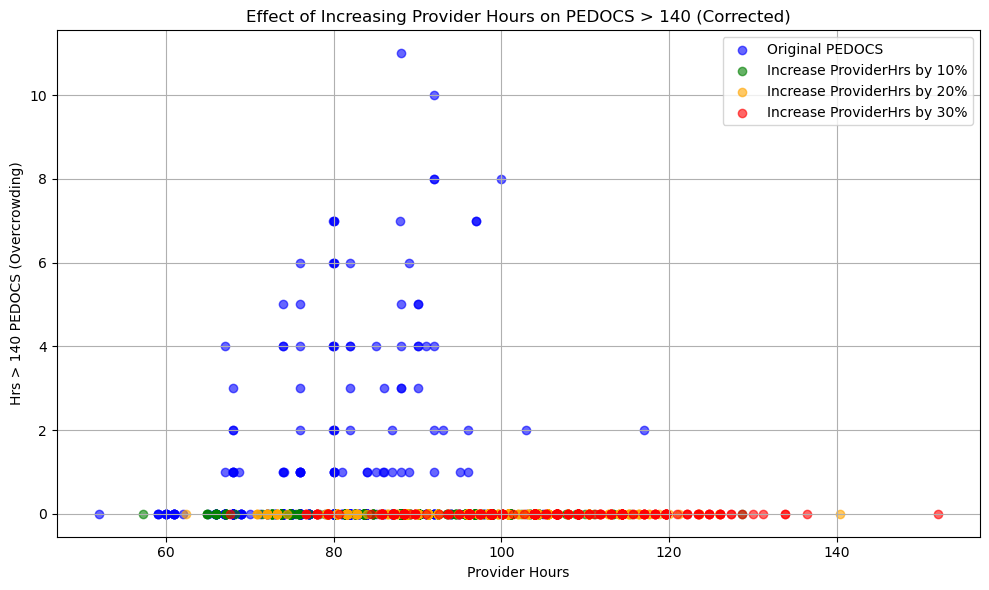

In [30]:
# Recalculating with constraints to ensure PEDOCS values don't go negative
reduced_pedocs_10_corrected = np.maximum(cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_10 / cleaned_daily_data['ProviderHrs'])), 0)
reduced_pedocs_20_corrected = np.maximum(cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_20 / cleaned_daily_data['ProviderHrs'])), 0)
reduced_pedocs_30_corrected = np.maximum(cleaned_daily_data['Hrs>140PEDOCS'] * (1 - (increased_provider_30 / cleaned_daily_data['ProviderHrs'])), 0)

# Plot the original vs simulated reduction in PEDOCS > 140 with increased staffing (corrected)
plt.figure(figsize=(10, 6))

# Original PEDOCS > 140 hours vs LWBS
plt.scatter(cleaned_daily_data['ProviderHrs'], cleaned_daily_data['Hrs>140PEDOCS'], alpha=0.6, label='Original PEDOCS', color='blue')

# Simulated PEDOCS reductions with increased provider hours (corrected)
plt.scatter(increased_provider_10, reduced_pedocs_10_corrected, alpha=0.6, label='Increase ProviderHrs by 10%', color='green')
plt.scatter(increased_provider_20, reduced_pedocs_20_corrected, alpha=0.6, label='Increase ProviderHrs by 20%', color='orange')
plt.scatter(increased_provider_30, reduced_pedocs_30_corrected, alpha=0.6, label='Increase ProviderHrs by 30%', color='red')

# Adding titles and labels
plt.title('Effect of Increasing Provider Hours on PEDOCS > 140 (Corrected)')
plt.xlabel('Provider Hours')
plt.ylabel('Hrs > 140 PEDOCS (Overcrowding)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<B>Interpretation of the Chart: Effect of Increasing Provider Hours on PEDOCS > 140</B>
* Original PEDOCS (Blue): This shows the initial distribution of Provider Hours and PEDOCS > 140 hours (overcrowding). As provider hours increase, overcrowding decreases, but some cases still experience extreme overcrowding.

* Increased Provider Hours Scenarios (Green, Orange, Red):

    * Green (Increase by 10%): A 10% increase in provider hours reduces PEDOCS > 140 for lower levels of overcrowding, with most cases having near-zero overcrowding.
    * Orange (Increase by 20%): A 20% increase shows even more improvement, with nearly all cases experiencing zero overcrowding.
    * Red (Increase by 30%): A 30% increase leads to the best outcomes, where almost no overcrowding occurs across most provider hour levels.

<B>Key Insights:</B>
* Impact of Staffing Adjustments: As provider hours increase by 10%, 20%, or 30%, PEDOCS > 140 hours decrease substantially, particularly for the higher levels of overcrowding.
* Overcrowding Reduction: Increasing provider hours by 20% to 30% can effectively reduce or eliminate overcrowding, especially in cases where provider hours were previously insufficient to handle patient volume.
* This correction ensures that PEDOCS > 140 does not fall below zero, which is a more realistic representation of how increased staffing could reduce overcrowding.

In this analysis of staffing adjustments and their impact on PEDOCS > 140 (overcrowding), several assumptions were made to simplify and model the relationship between provider hours and overcrowding. These assumptions are important to understand, as they can impact the accuracy and applicability of the results.

Key Assumptions:
1. Inverse Relationship Between Provider Hours and PEDOCS > 140 Hours
Assumption: Increasing provider hours directly reduces overcrowding (PEDOCS > 140 hours) in a linear or proportional manner.
Implication: We assumed that if provider hours increased by a certain percentage (e.g., 10%, 20%, 30%), there would be a proportional decrease in overcrowding. In reality, the relationship may be more complex or nonlinear, with diminishing returns at higher staffing levels.
Potential Limitation: There may be other factors influencing overcrowding that are not affected by provider hours, such as patient inflows, operational bottlenecks, or bed availability. Overcrowding might not be fully resolved by staffing increases alone.
2. No Floor Below Zero for PEDOCS > 140 Hours
Assumption: The model assumes that PEDOCS > 140 hours cannot go below zero, ensuring that overcrowding cannot turn negative.
Implication: This assumption is reasonable, as overcrowding should never result in negative values. However, we used a simple max(0) function to handle this, which may not capture more nuanced effects of staffing changes, such as specific hours during peak times being more important than others.
3. All Other Variables Held Constant
Assumption: The analysis assumes that all other factors influencing PEDOCS > 140 are constant except for provider hours. This means variables like patient arrivals, bed availability, or patient flow were not included or adjusted in this simulation.
Implication: In reality, overcrowding is driven by multiple factors, not just staffing levels. Changes in patient inflow or hospital discharge rates, for example, could either exacerbate or mitigate overcrowding, even with increased staffing. This assumption simplifies the model but may not fully capture the complexities of an operational emergency department.
4. Direct and Immediate Impact of Provider Hours on Overcrowding
Assumption: The model assumes that any increase in provider hours immediately and directly reduces PEDOCS > 140 in the same time frame.
Implication: This simplifies the effect of staffing changes, suggesting that as soon as more providers are available, overcrowding is reduced. In reality, provider hours might have a delayed impact, or their effect could depend on other operational factors (e.g., the ability to move patients to inpatient beds quickly).
5. Uniform Effect of Provider Hours
Assumption: All provider hours are treated equally, meaning the effect of an additional provider hour is the same, regardless of whether it occurs during a low-crowding or high-crowding period.
Implication: This uniform treatment doesn't account for peak times, when additional staffing might have a more significant effect on reducing overcrowding, or non-peak times, when adding more providers may have little to no impact. In reality, strategic deployment of staff during key hours could lead to more effective reductions in PEDOCS > 140 than uniform increases.
Conclusion:
While this analysis provides insights into how staffing adjustments can reduce overcrowding, it is based on several simplifying assumptions that may not fully reflect the complexity of real-world hospital operations. The most significant assumption is the proportional and direct relationship between provider hours and overcrowding, which in practice may be influenced by a range of other factors like patient flow, bed availability, and operational efficiency.

Next Steps:
Incorporate More Variables: To refine the model, it could be useful to include other operational factors such as patient arrivals, bed capacity, and discharge times, which may also influence overcrowding.
Non-Linear Modeling: Exploring non-linear relationships between staffing and overcrowding could yield more realistic results, as increasing provider hours might not always lead to proportional reductions in overcrowding.